#### Dataset Description
  Appliances Energy Prediction Dataset

The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.shape

(19735, 29)

#### Question 1
The percent of the total variation of the dependent variable Y explained by the set of independent variables X is measured by:
###### Answer: Coefficient of Determination
#### Question 2
How do you define a Residual?
###### Answer: Y − Y^
#### Question 3
The straight line graph of the equation Y = a + BX, the slope is horizontal if:
###### Answer: b = 0
#### Question 4
Which of the one is true about Heteroskedasticity?
###### Answer: Linear Regression with varying error terms
#### Question 5
Generally, which of the following method(s) is used for predicting continuous dependent variables?
1.Linear Regression
2.Logistic Regression
###### Answer:  1 only
#### Question 6
From the following options below, which of these is/are true about “Ridge” or “Lasso” regression methods in case of feature selection?
###### Answer: Lasso regression uses subset selection of features
#### Question 7
Which of the following sentences is/are true about outliers in Linear Regression:
###### Answer: Linear regression is sensitive to outliers
#### Question 8
Which of the following metrics can be used for evaluating regression models?
1.R Squared
2.Adjusted R Squared
3.F Statistics
4.RMSE / MSE / MAE
###### Answer: 1, 2, 3 and 4
#### Question 9
A best fit line relating X and Y has a R-Squared value of 0.75. How do I interpret this information?
###### Answer: 75% of the variance in Y is explained by X
#### Question 10
Which of the following measures is optimal for comparing the goodness of the fit of competing regression models involving the same dependent variable?
###### Answer: Standard deviation of the residuals
#### Question 11
The Lasso can be interpreted as least-squares linear regression where:
###### Answer: Weights are regularized with the L1 norm

#### Question 12
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?
###### Answer: 0.51

In [14]:
## Removing the columns 
df.drop(["date","lights"],axis=1, inplace= True)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


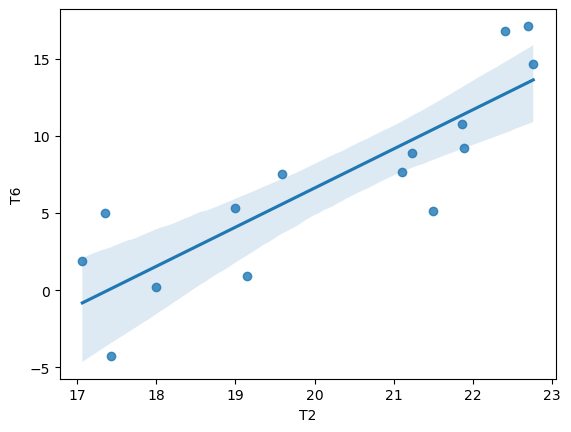

In [15]:
simple_reg=df[["T2","T6"]].sample(15,random_state=2)
sns.regplot(x="T2",y="T6", data= simple_reg);

#### Question 13
Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:
What is the Mean Absolute Error (in two decimal places)?
###### Answer: 0.05

In [16]:
## Normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df= pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
x = normalised_df.drop("Appliances", axis=1)
y = normalised_df["Appliances"]

In [17]:
## Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state =42)

In [18]:
## Linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
## Fitting the model
lm.fit(x_train,y_train)
## predicting valus
pred = lm.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = round(mean_absolute_error(y_test,pred),2)
mae

0.05

#### Question 14
What is the Residual Sum of Squares (in two decimal places)?
###### Answer: 45.35

In [45]:
## Residual Sum of Squares (RSS)
rss = round(np.sum(np.square(y_test-pred)),2)
rss

45.35

#### Question 15
What is the Root Mean Squared Error (in three decimal places)?
###### Answer: 0.088

In [46]:
## Root Mean Square Error (RMSE) 
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(y_test,pred)),3)
rmse


0.088

#### Question 16
What is the Coefficient of Determination (in two decimal places)?
###### Answer: 0.15

In [47]:
## R-Squared 
from sklearn.metrics import r2_score
r2= round(r2_score(y_test,pred),2)
r2

0.15

#### Question 17
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?
###### Answer: RH_2, RH_1


In [37]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.001)

In [38]:
x1 = np.array(normalised_df.T2).reshape(-1,1) 
y1 = normalised_df.T6
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3, random_state=42)
model2 = LinearRegression().fit(x1_train,y1_train)
y1_pred = model2.predict(x1_test)
y1_pred

array([0.23928945, 0.46794238, 0.23108472, ..., 0.3001772 , 0.4297256 ,
       0.3217686 ])

In [39]:
from sklearn.metrics import r2_score

# coefficient of determination (variance or dist from actual y_test)
r_score = r2_score(y1_test,y1_pred)
round(r_score,2)


0.64

In [45]:
weight_df = pd.DataFrame(pd.Series(model2.coef_,x_train.columns).reset_index())
weight_df.columns = ['Feature','weight']
weight_df

ValueError: Length of values (1) does not match length of index (26)

#### Question 18
Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?
###### Answer: No

In [41]:
ridge_reg = Ridge (alpha=0.4).fit(x_train,y_train)
ridge_ypred = ridge_reg.predict(x_test)
pd.Series(ridge_ypred,name='y_pred')

0       0.033219
1       0.240438
2       0.034613
3       0.107071
4       0.023944
          ...   
5916    0.084344
5917    0.075207
5918    0.068724
5919    0.100255
5920    0.058512
Name: y_pred, Length: 5921, dtype: float64

#### Question 19
Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?
###### Answer: 4

In [42]:
lasso_model = Lasso(alpha=0.001).fit(x_train,y_train)
lasso_ypred = lasso_model.predict(x_test)
pd.Series(lasso_ypred,name='lasso_ypred')

0       0.073703
1       0.081435
2       0.077161
3       0.088481
4       0.070655
          ...   
5916    0.079210
5917    0.086004
5918    0.077928
5919    0.090344
5920    0.083593
Name: lasso_ypred, Length: 5921, dtype: float64

In [43]:
lasso_weight_df = pd.DataFrame(pd.Series(lasso_model.coef_,x_train.columns).reset_index())
lasso_weight_df.columns = ['Feature','weight']
lasso_weight_df

,Feature,weight
0,T1,0.000000
1,RH_1,0.017880
2,T2,0.000000
3,RH_2,-0.000000
4,T3,0.000000
5,RH_3,0.000000
6,T4,-0.000000
7,RH_4,0.000000
8,T5,-0.000000
9,RH_5,0.000000


#### Question 20
What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)
###### Answer: 0.094

In [44]:
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_ypred))
round(lasso_rmse,3)

0.094